In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('customerData.csv')

In [27]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [28]:
df.shape

(200, 5)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [30]:
X = df.iloc[:, [3,4]].values

In [31]:
from sklearn.cluster import KMeans
wcss = [] #within cluster sum of point

In [ ]:
for i in range (1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

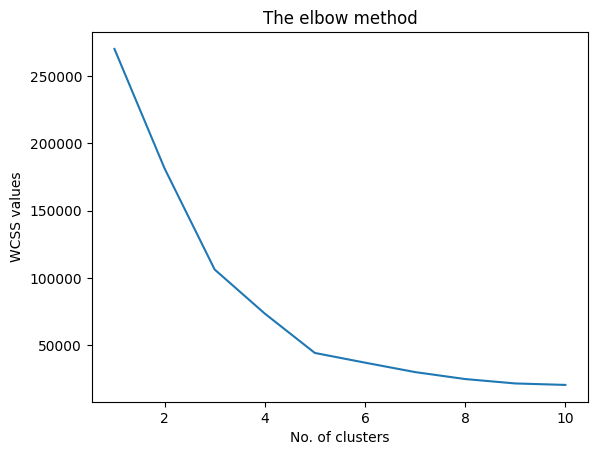

In [33]:
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS values')
plt.show()

In [36]:
kmeansmodel = KMeans(n_clusters = 5, init='k-means++', random_state =0)

In [37]:
y_kmeans = kmeansmodel.fit_predict(X)

c:\Users\ashur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


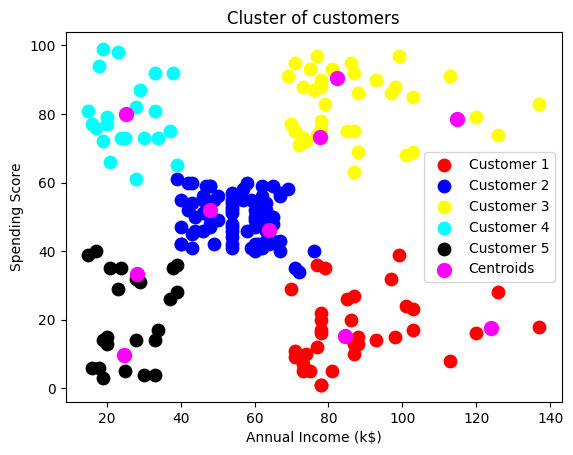

In [43]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=80, color="red", label="Customer 1")
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=80, color="blue", label="Customer 2")
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=80, color="yellow", label="Customer 3")
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s=80, color="cyan", label="Customer 4")
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s=80, color="black", label="Customer 5")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, color="magenta", label="Centroids")
plt.title('Cluster of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.show()